In [1]:
import numpy as np
from qiskit import QuantumCircuit

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [3]:
circ

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

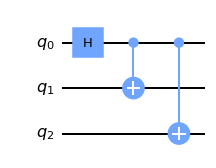

In [4]:
circ.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

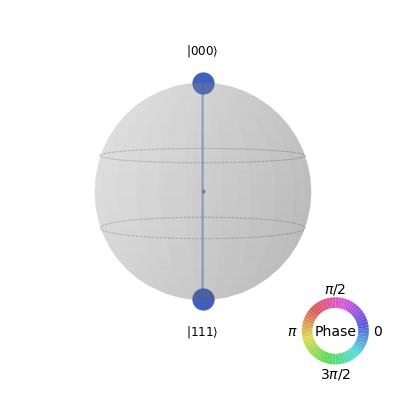

In [7]:
state.draw('qsphere')

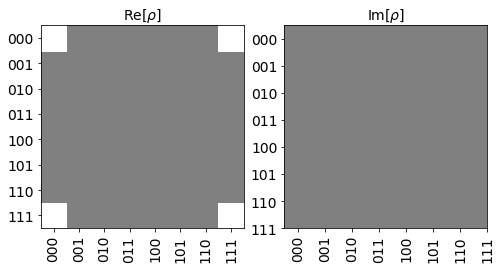

In [8]:
state.draw('hinton')

In [9]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

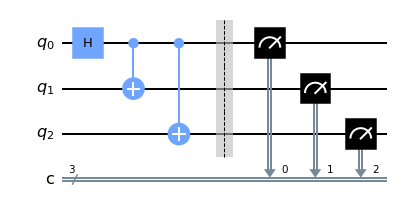

In [10]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [11]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [12]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 496, '111': 528}


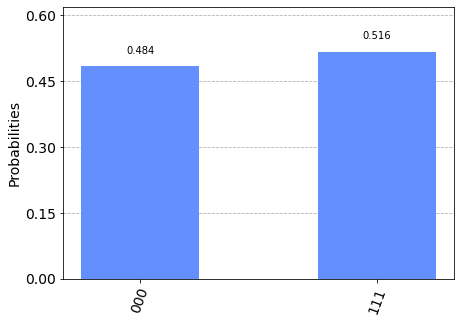

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright